## **Major Project: Intrusion Detection System (IDS) Using Machine Learning and Python**

### Author Information
- **Name:** Patil Atharva Vivek  
- **Roll No:** AA.SC.U3CSC2107159
- **Email:** patilav_bca2107159@ahead.students.amrita.edu  
- **Institution:** Amrita Vishwa Vidyapeetham  
- **Evaluator:** Ms. Deepa Sreedhar  

---

### Project Overview
This is my major project focused on developing an Intrusion Detection System (IDS) using Machine Learning techniques. The project analyzes network traffic data from the KDD Cup dataset to identify and mitigate potential security threats.


### Step 1: Data Preprocessing 
Importing libraries and reading features list from 'kddcup.names.txt' file

In [2]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# reading features list
with open("dataset/kddcup.names.txt", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

Appending columns to the dataset and adding a new column name 'target' to the dataset.

In [3]:
cols="""
duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate
"""

columns = []
for c in cols.split(',\n'):
    if (c.strip()):
        columns.append(c.strip())
        
columns.append('target')
print(len(columns)) # Output will be 41 + 1 = 42

42


Reading the 'training_attack_types.txt'


In [4]:
with open("dataset/training_attack_types.txt", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




Creating a dictionary of 'attack_types'

In [5]:
attack_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

 Reading the dataset (’kddcup.data.gz’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.

In [6]:
path = "dataset/kddcup.data.gz"
df = pd.read_csv(path, names = columns)

# Adding Attack Type Column
df["Attack Type"] = df.target.apply(lambda r:attack_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


Shape of dataframe and getting data type of each feature

In [7]:
df.shape

(4898431, 43)

Finding missing values

In [8]:
df.isnull().sum()
# no missing values found

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Finding Categorical Features

In [9]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

**Visualizations:**

1. Visualization: Protocol Type Distribution


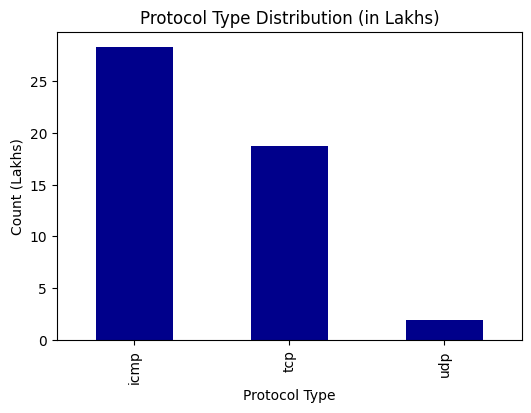

In [10]:
plt.figure(figsize=(6, 4))
protocol_counts = df['protocol_type'].value_counts() / 100000  # Convert to Lakhs
protocol_counts.plot(kind='bar', color='darkblue')
plt.title('Protocol Type Distribution (in Lakhs)')
plt.xlabel('Protocol Type')
plt.ylabel('Count (Lakhs)')
plt.show()

2. Visualization: Logged in Success Rate

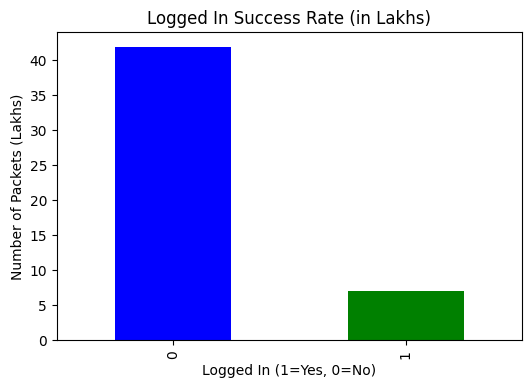

In [11]:
plt.figure(figsize=(6, 4))
logged_in_counts = df['logged_in'].value_counts() / 100000  # Convert to Lakhs
logged_in_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Logged In Success Rate (in Lakhs)')
plt.xlabel('Logged In (1=Yes, 0=No)')
plt.ylabel('Number of Packets (Lakhs)')
plt.show()

3. Visualization: Attack Type Distribution in Lakhs

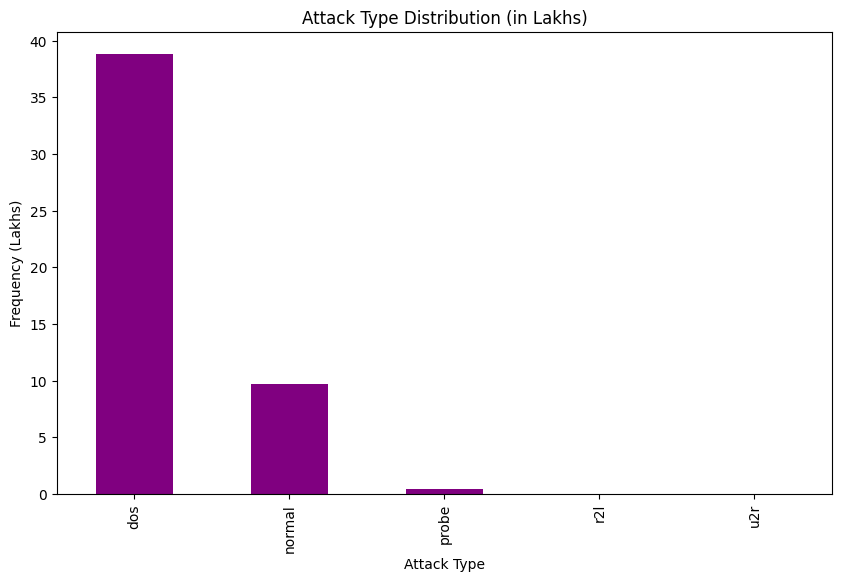

In [12]:
plt.figure(figsize=(10, 6))
attack_counts = df['Attack Type'].value_counts() / 100000  # Convert to Lakhs
attack_counts.plot(kind='bar', color='purple')
plt.title('Attack Type Distribution (in Lakhs)')
plt.xlabel('Attack Type')
plt.ylabel('Frequency (Lakhs)')
plt.show()

Data Correlation - Finding the highly correlated variables using heatmap and ignore them for analysis  

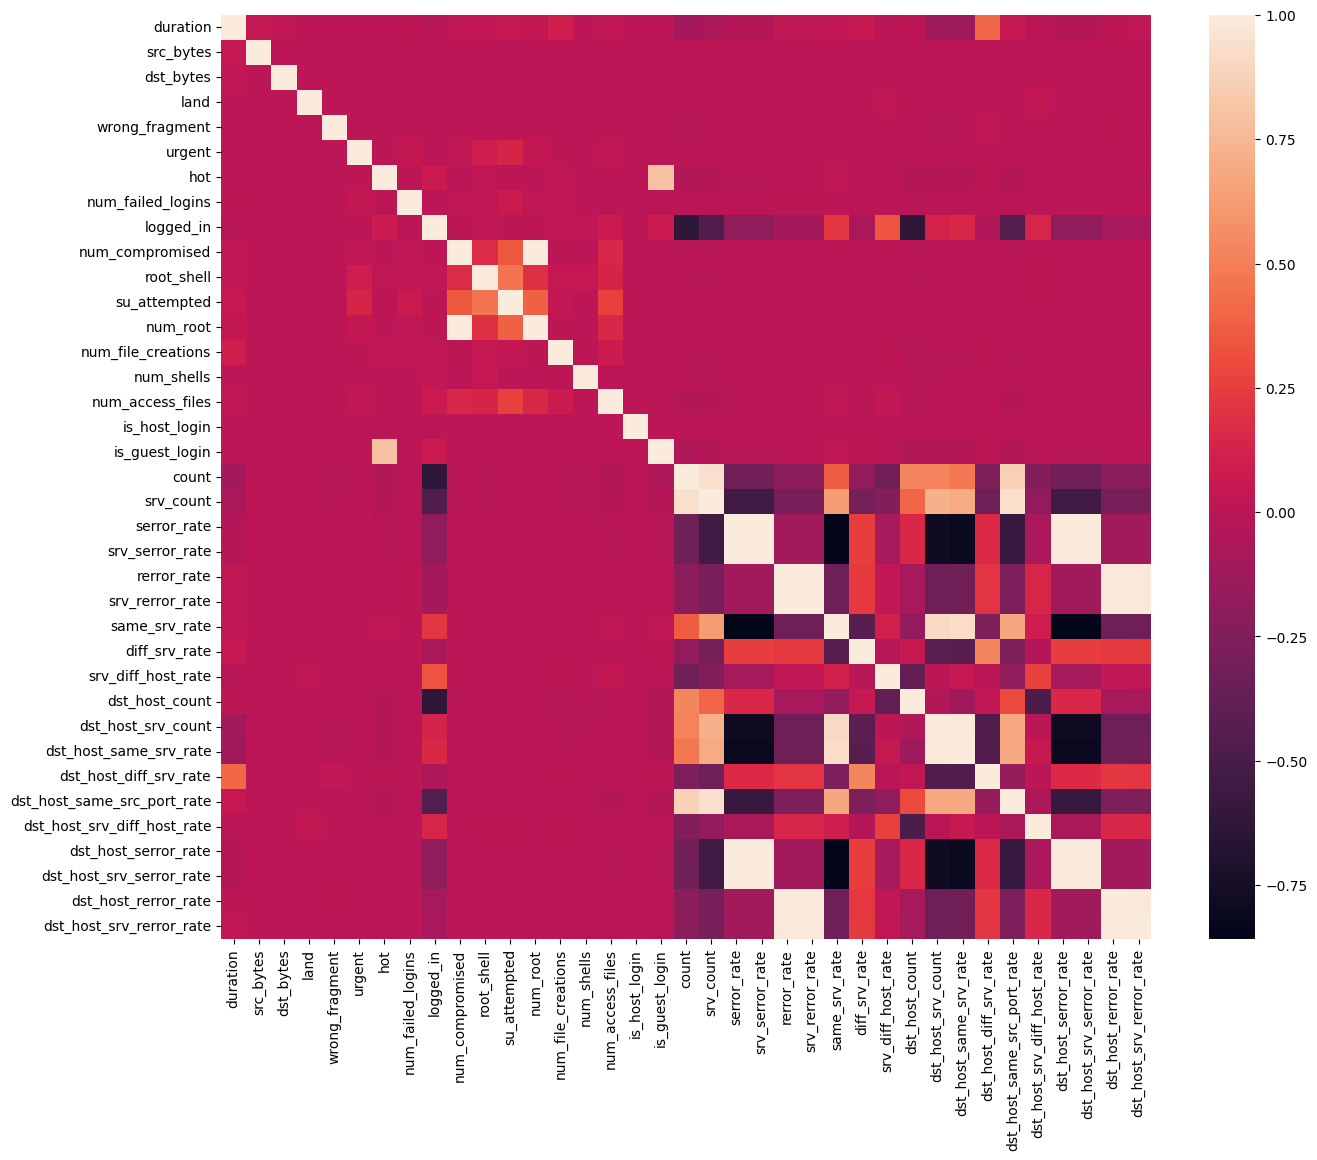

In [13]:
# Drop columns with NaN
df = df.dropna(axis='columns')

# Keep columns where there are more than 1 unique values and are numeric
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]

# Now calculate the correlation matrix
corr = ndf.corr()

plt.figure(figsize = (15, 12))
sns.heatmap(corr)
plt.show()

Removing highly correlated features from the dataset

In [14]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’

In [15]:
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [16]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

Remove irrelevant features such as ‘service’ before modelling

In [17]:
df.drop("service", axis = 1, inplace = True)

### Step 2 – Modelling
Importing libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Splitting features and target variables with scaling

In [19]:
# Splitting the dataset
df = df.drop(['target', ], axis = 1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4898431, 33)
(3281948, 32) (1616483, 32)
(3281948, 1) (1616483, 1)


Applying various machine learning classification algorithms such as Support Vector Machines, Random Forest, Naive Bayes, Decision Tree, Logistic Regression to create different models.

Python implementation of Gaussian Naive Bayes

In [20]:
# Training the model using Gaussian Naive Bayes on X_train and y_train

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
gnb_train_time = end_time - start_time # Created for visualizing comfort

print("Training Time: ", gnb_train_time)

Training Time:  3.8394596576690674


In [21]:
# Test the Gaussian Naive Bayes model by making predictions on the test data
start_time = time.time()
y_test_pred = clfg.predict(X_test) # Change the X_test to test using test data 
end_time = time.time()
gnb_test_time = end_time - start_time # Created for visualizing comfort

print("Testing Time: ", end_time - start_time)

Testing Time:  2.03415846824646


In [22]:
clfg_train_score = clfg.score(X_train, y_train)
print("Train score is:", clfg_train_score)
clfg_test_score = clfg.score(X_test, y_test)
print("Test score is:", clfg_test_score)

Train score is: 0.9251993023655463
Test score is: 0.9249073451437473


Python implementation of Decision Trees

In [23]:
# Train a Decision Tree Classifier using entropy criterion and a maximum depth of 4, while measuring the training time.

from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion = "entropy", max_depth= 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
dt_train_time = end_time - start_time # Created for visualizing comfort

print("Training Time: ", end_time - start_time)

Training Time:  10.452671766281128


In [24]:
# Predict the class labels for the training data and measure the testing time.

start_time = time.time()
y_test_pred = clfd.predict(X_test) # Change the X_test to test using test data 
end_time = time.time()
dt_test_time = end_time - start_time # Created for visualizing comfort

print("Testing Time: ", end_time - start_time)

Testing Time:  0.2386167049407959


In [25]:
clfd_train_score = clfd.score(X_train, y_train)
print("Train score is:", clfd_train_score)
clfd_test_score = clfd.score(X_test, y_test)
print("Test score is:", clfd_test_score)

Train score is: 0.996125167126353
Test score is: 0.9961453352741724


Python code implementation of Random Forest

In [26]:
# Train a Random Forest Classifier with 30 estimators and measure the training time.

from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators= 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
rf_train_time = end_time - start_time # Created for visualizing comfort

print("Training Time: ", end_time - start_time)

# Training time took 180 seconds for the first time.
# Training time took 175 seconds for the second time.
# Training time took 152 seconds for the third time.

Training Time:  75.08488368988037


In [27]:
start_time = time.time()
y_test_pred = clfr.predict(X_test)
end_time = time.time()
rf_test_time = end_time - start_time # Created for visualizing comfort

print("Testing time: ", end_time - start_time)

Testing time:  2.5016825199127197


In [28]:
clfr_train_score = clfr.score(X_train, y_train)
print("Train score is:", clfr_train_score)
clfr_test_score = clfr.score(X_test, y_test)
print("Test score is:", clfr_test_score)

Train score is: 0.999961608166857
Test score is: 0.9998583344210857


Python implementation of Support Vector Classifier

In [29]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

clfs = LinearSVC()
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
svc_train_time = end_time - start_time # Created for visualizing comfort

print("Training Time: ", end_time - start_time)

Training Time:  37.95753359794617


In [30]:
# Predict the class labels for the training data and measure the testing time.

start_time = time.time()
y_test_pred = clfs.predict(X_test)
end_time = time.time()
svc_test_time = end_time - start_time # Created for visualizing comfort

print("Testing Time: ", end_time - start_time)

Testing Time:  0.16977906227111816


In [31]:
clfs_train_score = clfs.score(X_train, y_train)
print("Train score is:", clfs_train_score)
clfs_test_score = clfs.score(X_test, y_test)
print("Test score is:", clfs_test_score)

Train score is: 0.9978811364470126
Test score is: 0.9978589320147505


Python implementation of Logistic Regression

In [32]:
# Train a Logistic Regression model on the training data with a high iteration limit to ensure convergence

from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter= 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
lr_train_time = end_time - start_time # Created for visualizing comfort

print("Training Time: ", end_time - start_time)

Training Time:  18.574302434921265


In [33]:
# Predict the class labels for the test data using the trained Logistic Regression model and measure the prediction time

start_time = time.time()
y_test_pred = clfl.predict(X_test)
end_time = time.time()
lr_test_time = end_time - start_time # Created for visualizing comfort

print("Testing Time: ", end_time - start_time)

Testing Time:  0.17827391624450684


In [34]:
clfl_train_score = clfl.score(X_train, y_train)
print("Train score is:", clfl_train_score)
clfl_test_score = clfl.score(X_test, y_test)
print("Test score is:", clfl_test_score)

Train score is: 0.9977690079184679
Test score is: 0.9977704683563019


Python implementation of Gradient Descent

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Convert X_train to DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Convert y_train to Series if it's a NumPy array
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

# Randomly sample 10% of the training data
X_train_sampled = X_train.sample(frac=0.1, random_state=1)  # 10% of data

# Ensure y_train corresponds to the sampled X_train using random sampling
y_train_sampled = y_train.sample(frac=0.1, random_state=1)  # Sample the same percentage

# Convert y_train_sampled to 1D using .ravel()
y_train_sampled = y_train_sampled.values.ravel()  # This avoids the warning

# Train the Gradient Boosting Classifier on the sampled data
clfgd = GradientBoostingClassifier(n_estimators=50, max_depth=3, subsample=0.5, random_state=0)
start_time = time.time()
clfgd.fit(X_train_sampled, y_train_sampled)  # Train on the sampled data
end_time = time.time()
gd_train_time = end_time - start_time # Created for visualizing comfort

# Output the training time
print("Training Time: ", end_time - start_time)

Training Time:  58.87255072593689


In [36]:
start_time = time.time()
y_test_pred = clfgd.predict(X_test)
end_time = time.time()
gd_test_time = end_time - start_time # Created for visualizing comfort

print("Testing time: ", end_time-start_time)

Testing time:  4.7097015380859375


In [37]:
clfgd_train_score = clfgd.score(X_train, y_train)
print("Train score is:", clfgd_train_score)
clfgd_test_score = clfgd.score(X_test, y_test)
print("Test score is:", clfgd_test_score)

Train score is: 0.9897850301101663
Test score is: 0.9898248233974623


### Model Evaluation
In this section, we will evaluate the performance of our trained models using accuracy, precision, recall, F1 score, and confusion matrix.

In [38]:
# Import necessary libraries for metrics calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate and return the metrics
def evaluate_model(y_test, y_test_pred, model_name):
    print(f"--- {model_name} Evaluation ---")

    # Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Precision
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    print(f"Precision: {precision:.4f}")
    
    # Recall
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    print(f"Recall: {recall:.4f}")
    
    # F1 Score
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(cm)
    
    print("\n")  # New line for readability
    
    # Return the metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Make predictions for each model
nb_predictions = clfg.predict(X_test)  # For Gaussian Naive Bayes
dt_predictions = clfd.predict(X_test)    # For Decision Tree
rf_predictions = clfr.predict(X_test)    # For Random Forest
svc_predictions = clfs.predict(X_test)   # For Support Vector Classifier
lr_predictions = clfl.predict(X_test)     # For Logistic Regression
gd_predictions = clfgd.predict(X_test)    # For Gradient Descent

# Call the function for each model and store the results
nb_metrics = evaluate_model(y_test, nb_predictions, "Gaussian Naive Bayes")
dt_metrics = evaluate_model(y_test, dt_predictions, "Decision Tree")
rf_metrics = evaluate_model(y_test, rf_predictions, "Random Forest")
svc_metrics = evaluate_model(y_test, svc_predictions, "Support Vector Classifier")
lr_metrics = evaluate_model(y_test, lr_predictions, "Logistic Regression")
gd_metrics = evaluate_model(y_test, gd_predictions, "Gradient Descent")

# Now you can access metrics like this
print(nb_metrics['accuracy'])  # Access Gaussian Naive Bayes accuracy

##### This will take 7 minutes to complete #####


--- Gaussian Naive Bayes Evaluation ---
Accuracy: 0.9249
Precision: 0.9738
Recall: 0.9249
F1 Score: 0.9389
Confusion Matrix:
[[1277434     609    3304      12     124]
 [  30223  204150   60156    2922   23570]
 [    201       3   13359       1      30]
 [      0       3       7     137     218]
 [      0       0       2       1      17]]


--- Decision Tree Evaluation ---
Accuracy: 0.9961
Precision: 0.9959
Recall: 0.9961
F1 Score: 0.9957
Confusion Matrix:
[[1280811     644      28       0       0]
 [    231  320695      95       0       0]
 [     21    4827    8746       0       0]
 [      2     360       3       0       0]
 [      3      15       2       0       0]]


--- Random Forest Evaluation ---
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
Confusion Matrix:
[[1281464      17       2       0       0]
 [      6  320979      22      14       0]
 [      1     120   13473       0       0]
 [      0      34       0     331       0]
 [      0      13       0      

Comparing Accuracy and F1 Score metrics with each model

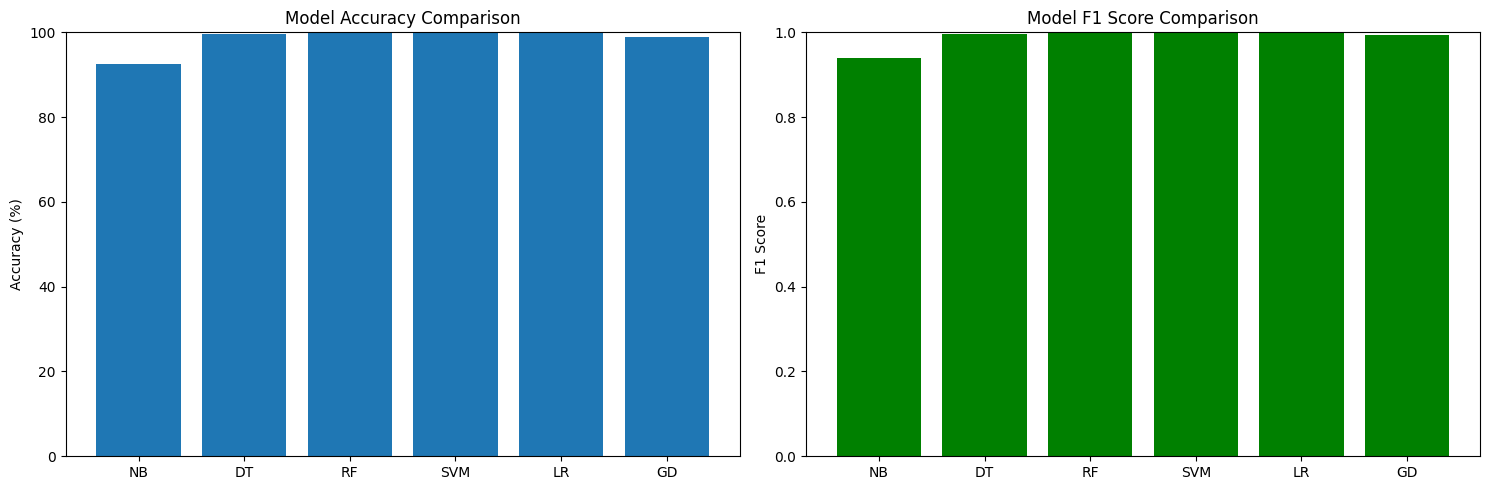

In [40]:
# Model names and their corresponding metrics
model_names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GD']

# Model names and their corresponding metrics
model_names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GD']

# Accuracy values for all models (converted to percentage)
accuracy_values = [nb_metrics['accuracy'] * 100, 
                   dt_metrics['accuracy'] * 100, 
                   rf_metrics['accuracy'] * 100, 
                   svc_metrics['accuracy'] * 100, 
                   lr_metrics['accuracy'] * 100, 
                   gd_metrics['accuracy'] * 100]

# F1 Score values for all models
f1_values = [nb_metrics['f1_score'], 
            dt_metrics['f1_score'], 
            rf_metrics['f1_score'], 
            svc_metrics['f1_score'], 
            lr_metrics['f1_score'], 
            gd_metrics['f1_score']]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axs[0].bar(model_names, accuracy_values)
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_ylim(0, 100)  # Set y-axis limit for accuracy

# Plot F1 Score
axs[1].bar(model_names, f1_values, color='green')
axs[1].set_title('Model F1 Score Comparison')
axs[1].set_ylabel('F1 Score')
axs[1].set_ylim(0, 1)  # Set y-axis limit for F1 Score

# Adjust layout
plt.tight_layout()
plt.show()

Analyze the training and testing accuracy of each model

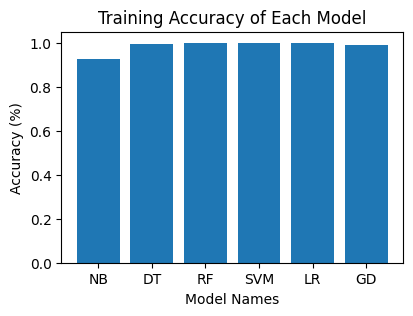

In [41]:
# Training accuracy of each model

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GD']
values = [clfg_train_score, clfd_train_score, clfr_train_score, clfs_train_score, clfl_train_score, clfgd_train_score]

# Create a figure
f = plt.figure(figsize=(15, 3), num=10)

# Plot the bar chart
plt.subplot(131)
plt.bar(names, values)

# Adding title and labels
plt.title('Training Accuracy of Each Model')
plt.xlabel('Model Names')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()

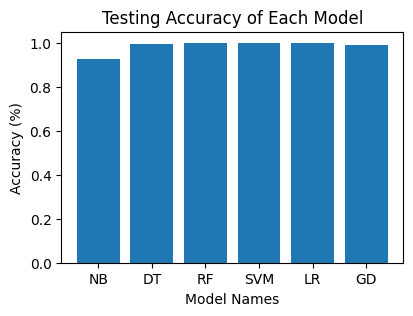

In [42]:
# Testing accuracy of each model
import matplotlib.pyplot as plt

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GD']
values = [clfg_test_score, clfd_test_score, clfr_test_score, clfs_test_score, clfl_test_score, clfgd_test_score]

# Create a figure
f = plt.figure(figsize=(15, 3), num=10)

# Plot the bar chart
plt.subplot(131)
plt.bar(names, values)

# Adding title and labels
plt.title('Testing Accuracy of Each Model')
plt.xlabel('Model Names')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()



Analyse the training and testing time of each model

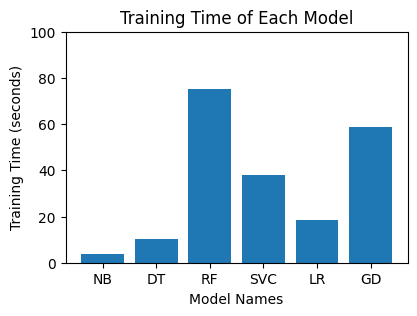

In [43]:
# Training time of each model in seconds

names = ['NB', 'DT', 'RF', 'SVC', 'LR', 'GD']
values = [gnb_train_time, dt_train_time, rf_train_time, svc_train_time, lr_train_time, gd_train_time]

# Create a figure
f = plt.figure(figsize=(15, 3), num=10)

# Plot the bar chart
plt.subplot(131)
plt.bar(names, values)

# Adding title and labels
plt.title('Training Time of Each Model')
plt.xlabel('Model Names')
plt.ylabel('Training Time (seconds)')

# Set y-axis limit to 100 seconds
plt.ylim(0, 100)

# Show the plot
plt.show()

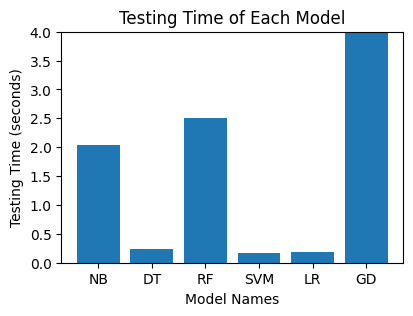

In [44]:
# Testing time of each model in seconds
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GD']
values = [gnb_test_time, dt_test_time, rf_test_time, svc_test_time, lr_test_time, gd_test_time]

# Create a figure
f = plt.figure(figsize=(15, 3), num=10)

# Plot the bar chart
plt.subplot(131)
plt.bar(names, values)

# Adding title and labels
plt.title('Testing Time of Each Model')
plt.xlabel('Model Names')
plt.ylabel('Testing Time (seconds)')

# Set y-axis limit to 4 seconds
plt.ylim(0, 4)

# Show the plot
plt.show()

### Beep sound after executing the whole file

In [45]:
##########################################################
# Beep sound after executing the cell or code for Windows
##########################################################

import winsound

print("The main.ipynb is completed running")

# Beep sound after the code finishes
winsound.Beep(1000, 2000)  # Frequency: 1000 Hz, Duration: 2000 ms

The main.ipynb is completed running


In [46]:
##########################################################
# Beep sound after executing the cell or code for macOS
##########################################################

import os

print("The main.ipynb is completed running")

# Beep sound after the code finishes
os.system('afplay /System/Library/Sounds/Glass.aiff')

# Wait for a specified duration (in seconds)
time.sleep(3)  # Pauses for 3 seconds

The main.ipynb is completed running
